<a href="https://colab.research.google.com/github/keilabcs/IN1024-2020-1-UFPE/blob/main/4_Redu%C3%A7%C3%A3o_dos_padr%C3%B5es_Moir%C3%A9_utilizando_filtro_notch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Federal de Pernambuco
Centro de Informática - Cin

Programa de Pós-Graduação

IN1024 - Processamento de Imagens

Keila Barbosa Costa dos Santos

**Exercício Prático do *Capítulo* 4**

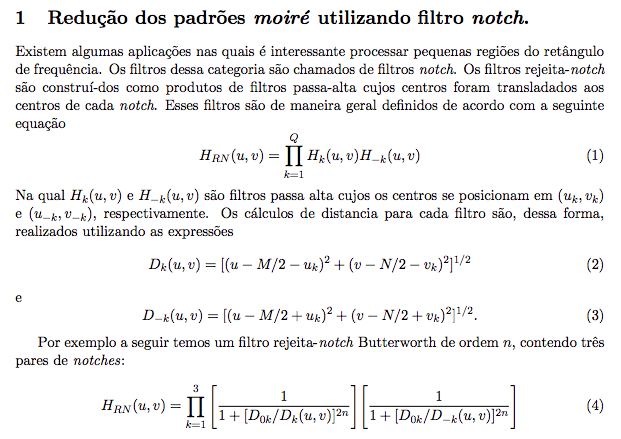

**1.1 Atividade**

Implemente o Exemplo 4.23 da terceira edição do livro texto utilizando filtros rejeita-notch Butterworth de ordem n = 4. Encontre o valor do raio D0 fazendo uma inspeção visual do espectro. 
Para encontrar os centros dos notches, determine iterativamente a partir do espectro. 
Os resultados apresentados devem ser semelhantes(não necessariamente idênticos)ao encontrado na Figura 1.

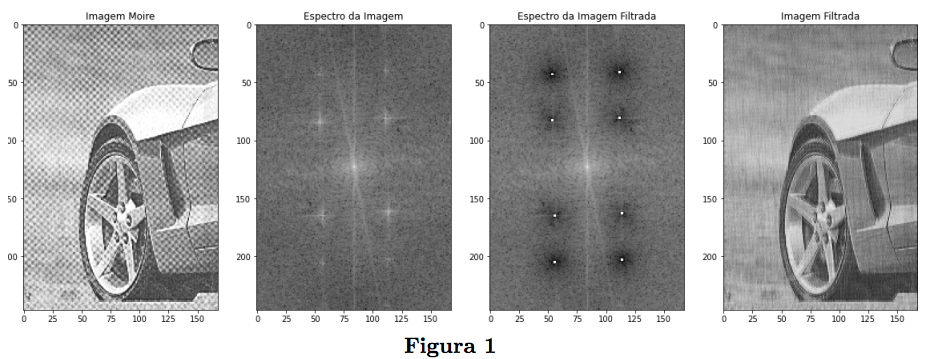

In [ ]:
# Carregando pacotes 
import matplotlib.pyplot as plt
from scipy import misc
import cv2
import numpy as np
from pylab import *
import time

In [ ]:
# Download Images
from google.colab import files
pbfile = files.upload()

Saving car_moire.tif to car_moire.tif


In [ ]:
!ls -la

total 60
drwxr-xr-x 1 root root  4096 Sep 18 02:49 .
drwxr-xr-x 1 root root  4096 Sep 18 02:46 ..
-rw-r--r-- 1 root root 41758 Sep 18 02:49 car_moire.tif
drwxr-xr-x 1 root root  4096 Sep 16 16:29 .config
drwxr-xr-x 1 root root  4096 Sep 16 16:29 sample_data


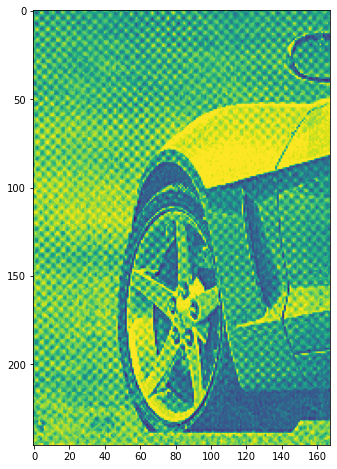

In [ ]:
# Lendo imagem em tons de cinza
img = cv2.imread("car_moire.tif", 0)
plt.figure(figsize = (15,8))
plt.imshow(img)
plt.show()

Filtros rejeita-notch Butterworth de ordem n = 4.

O valor do raio D0 fazendo uma inspeção visual do espectro.

In [ ]:
# Dimensões da imagem
x,y = img.shape   # valor x,y

In [ ]:
# Fourier
ini = time.time()
f1 = np.fft.fft2(img)
f2 = np.fft.fftshift(f1)
timef = time.time()
print("Tempo calculo Fourier: ", timef-ini, 'segundos')

Tempo calculo Fourier:  0.005557537078857422 segundos


In [ ]:
# Calculando spectro da imagem
spectre = 20*np.log(np.abs(f2))

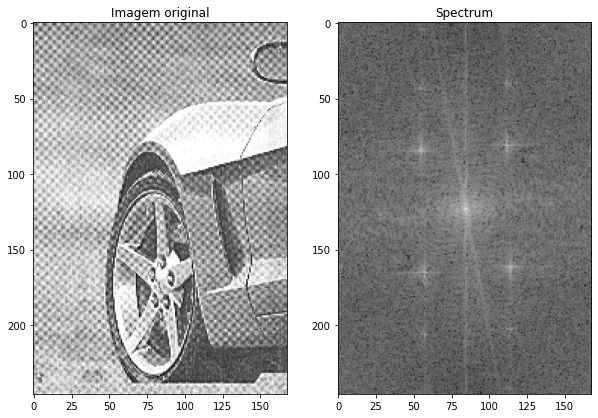

In [ ]:
# Plotando resultados
plt.figure(figsize=(10,15))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Imagem original')
plt.subplot(122),plt.imshow(spectre, cmap = 'gray')
plt.title('Spectrum')
plt.show()

In [ ]:
# Matrizes de pontos (cada coluna representa uma coordenada x,y)
matrix1 = [
    [73, 72, 36, 32],
    [52, 19, 71, 52],
]

matrix2 = [
    [110, 136, 136, 176],
    [33, 27, 60, 60],
]

In [ ]:
# Convertendo matrizes para matrix numpy
matrix1 = np.matrix(matrix1)
matrix2 = np.matrix(matrix2)

In [ ]:
# Matriz controle
normal = [
    [198 ,198, 198, 198],
    [162, 162, 162, 162],
]

In [ ]:
# Usando simetria para encontrar pontos do 3ª e 4ª quadrante
matrixr1 =  normal - matrix1 
matrixr2 = normal - matrix2 

w = 3
j = 0

In [ ]:
!pip install time

In [ ]:
# Filtrando cada ponto com janela 8x8 definida em W
ini = time.time()
for j in range(4):
    f2[matrix1[1,j]-w:matrix1[1,j]+w, matrix1[0,j]-w:matrix1[0,j]+w] = 1   # Aplicando janela de corte 7x7
    f2[matrix2[0,j]-w:matrix1[0,j]+w, matrix1[1,j]-w:matrix1[1,j]+w] = 1
    f2[matrixr1[1,j]-w:matrixr1[1,j]+w, matrixr1[0,j]-w:matrixr1[0,j]+w] = 1
    f2[matrixr2[1,j]-w:matrixr2[1,j]+w, matrixr2[0,j]-w:matrixr2[0,j]+w] = 1

f2[32-w:32+w, 110-w:110+w] = 1        
f2[62-w:62+w, 135-w:135+w] = 1
f2[60-w:60+w, 176-w:176+w] = 1
f2[27-w:27+w, 134-w:134+w] = 1 

f_inverse = np.fft.ifftshift(f2)       
returns = np.fft.ifft2(f_inverse)    # Retornando imagem para o domínio espacial
returns = np.abs(returns)                  
timef = time.time() 
print("Tempo aplicação filtro Notch: ", timef-ini, 'segundos')

spectre_filter = 20*np.log(np.abs(f2))

Tempo aplicação filtro Notch:  0.00897216796875 segundos


Operação 3: Resultados apresentados

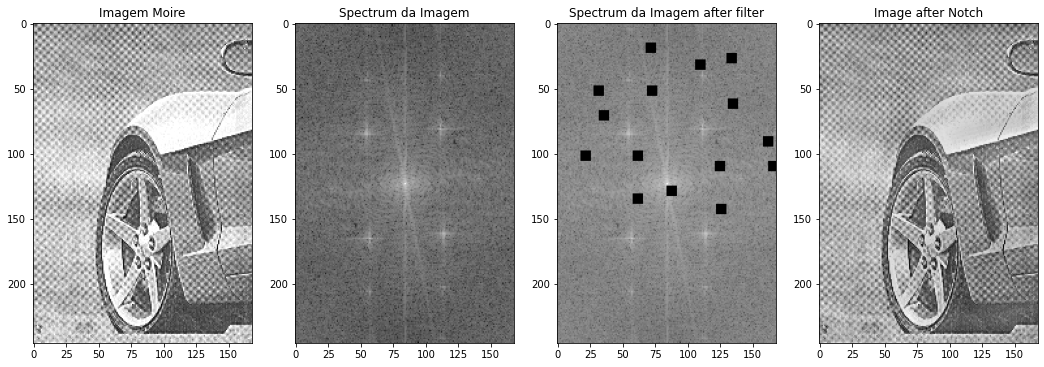

In [ ]:
#plotando resultado final
plt.figure(figsize=(18,22))
plt.subplot(141),plt.imshow(img, cmap = 'gray')
plt.title('Imagem Moire')

plt.subplot(142),plt.imshow(spectre, cmap = 'gray')
plt.title('Spectrum da Imagem')

plt.subplot(143),plt.imshow(spectre_filter, cmap = 'gray')
plt.title('Spectrum da Imagem after filter')

plt.subplot(144),plt.imshow(returns, cmap = 'gray')
plt.title('Image after Notch')

plt.show()